<a href="https://colab.research.google.com/github/sanamehrabbeigi/Deep-Learning-Course/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2: MNIST Digit Classification


<div dir='rtl'style="text-align: right;font-family:verdana;">

در این تکلیف هدف طراحی مدلی بر اساس شبکه‌های Fully Connected
برای حل مساله‌ی دسته‌بندی اعداد دست نویس است.
دیتاستی که در اختیار شما قرار داده شده است, دیتاست
[MNIST](http://yann.lecun.com/exdb/mnist/)
است
که شامل ۱۰ کلاس برای دسته‌بندی اعداد دست نویس ۰-۹ است.
در این دیتاست در مجموع ۷۰۰۰۰ تصویر برای تمام ۱۰ کلاس در نظر گرفته شده است که شامل ۶۰۰۰۰ تصویر برای آموزش و ۱۰۰۰۰ تصویر برای تست است.
اندازه‌ی تمام تصاویر در این دیتاست ۲۸*۲۸
می‌باشد.
شبکه‌ی طراحی شده باید بتواند تشخیص دهد که تصویر ورودی متعلق به کدام یک از این کلاس‌ها می‌باشد.
طراحی تعداد لایه‌های شبکه و تعداد نورون‌ها بر عهده شما می‌باشد.
ساختار شبکه‌ی مورد نظر با کراس در نظر گرفته شده است. در ساختار شبکه‌ی خود از لایه‌ی
[Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
برای یکسان سازی ابعاد ورودی به مدل خود استفاده کنید.
در نهایت دقت مدل را براساس معیارهای
Accuracy, Precision, Recall
و
F1_measure
 بدست آورید.

کد شروع در اختیار شما قرار داده شده است. شما موظف هستید قسمت‌هایی که با TODO نشان داده شده است را به بهترین نحو پر کنید تا به دقت بالایی در شبکه خود دست پیدا کنید.


<div dir='rtl'style="text-align: right;font-family:verdana;">

تاثیر موارد زیر را بر عملکرد مدلی که طراحی کرده‌اید بررسی و تحلیل کنید:


*   تعداد لایه‌های Fully Connected
*   تعداد نورون‌های هر لایه
* نرخ یادگیری و batch size
* توابع بهینه‌ساز
* تعداد داده‌های آموزشی و تست

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

## 1.1 MNIST dataset


In [ ]:
mnist = tf.keras.datasets.mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_X = (np.expand_dims(train_X, axis=-1)/255.).astype(np.float32)
train_Y = (train_Y).astype(np.int64)
test_X = (np.expand_dims(test_X, axis=-1)/255.).astype(np.float32)
test_Y = (test_Y).astype(np.int64)

11501568/11490434 [==============================] - 0s 0us/step


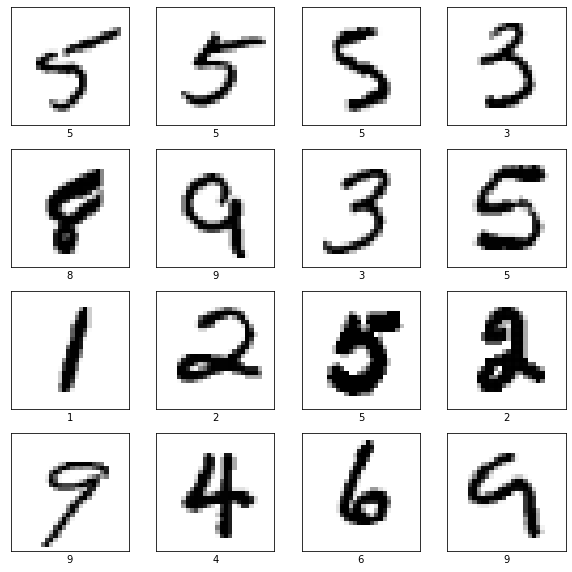

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    img_index = random_inds[i]
    plt.imshow(np.squeeze(train_X[img_index]), cmap=plt.cm.binary)
    plt.xlabel(train_Y[img_index])

## 1.2 Neural Network for Handwritten Digit Classification


In [ ]:
# your model
def Model_fc():
  fully_connected_model = tf.keras.Sequential([
                                               tf.keras.layers.Flatten(),
                                               tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                               tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# '''TODO'''
  ])
  return fully_connected_model

model = Model_fc()

<div dir='rtl'style="text-align: right;font-family:verdana;">

در هنگام
[compile](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile)
کردن
باید برخی از خصوصیات مورد نیاز هنگام آموزش شبکه مانند تابع
هزینه,
تابع بهینه‌ساز و معیار برای اندازه‌گیری دقت شبکه
 مشخص شوند. تاثیر این موارد را در آموزش شبکه مورد بررسی قرار دهید.



---
تابع هزینه:loss='sparse_categorical_crossentropy

تابع بهینه ساز:SGD


معیار اندازه گیری: دقت



In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model



<div dir='rtl'style="text-align: right;

---

font-family:verdana;">



با فراخوانی تابع
[fit](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit)
می‌توانید مدل خود را بر روی داده‌های دیتاست آموزش دهید. آموزش در تعداد epochها
 و اندازه‌ی bacthهای مناسب انجام می‌شود.
 تاثیر تغییر تعداد اوپوک و batch size
 را مورد بررسی قرار دهید و نتایج را بیان کنید.



---
 batch_size=64, epochs=5
 هر چه ایپوک بیشتر شود شبکه بیشتر آموزش میبیند مخصوصا در شبکه SGD
 و بچ سایز 64 و 128 نتیجه های خوبی دریافت کردند.


In [ ]:
model.fit(train_X, train_Y, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3737 - accuracy: 0.8951
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1919 - accuracy: 0.9455
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1444 - accuracy: 0.9582
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1168 - accuracy: 0.9671
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0990 - accuracy: 0.9716


### Evaluate accuracy on the test dataset


In [ ]:
'''TODO: Use the evaluate method to test the model!'''
score = model.evaluate(train_X, train_Y)

print('Test score: ', score[0])
print('Test accuracy: ', score[1])
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0863 - accuracy: 0.9760
Test score:  0.08632955700159073
Test accuracy:  0.9759500026702881
accuracy: 97.60%
